In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [247]:
# load the data into pandas dataframe
iris_df = pd.read_csv('Iris.csv')

In [248]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [249]:
# hmm id and index column is overlapping and the names of column is also long let me change that

del iris_df['Id']
iris_df.rename(columns = {'SepalLengthCm':'sepal_length'}, inplace = True)
iris_df.rename(columns = {'SepalWidthCm':'sepal_width'}, inplace = True)
iris_df.rename(columns = {'PetalLengthCm':'petal_length'}, inplace = True)
iris_df.rename(columns = {'PetalWidthCm':'petal_width'}, inplace = True)
iris_df.rename(columns = {'Species':'species'}, inplace = True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [250]:
iris_df.shape

(150, 5)

In [251]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [252]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [253]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [254]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [255]:
iris_df[iris_df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


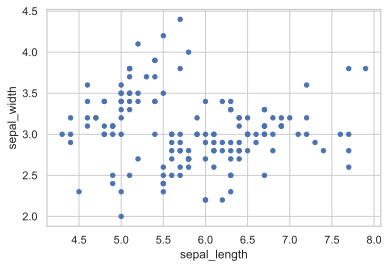

In [256]:
iris_df.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width');
plt.show();

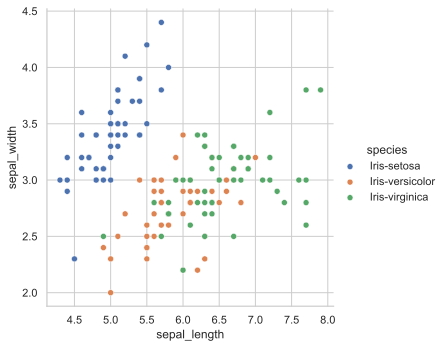

In [257]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_df, hue = 'species', height = 5)\
.map(sns.scatterplot, 'sepal_length', 'sepal_width')\
.add_legend()

[]

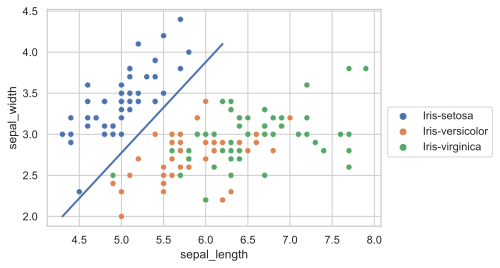

In [258]:
sns.scatterplot(data = iris_df, x = 'sepal_length', y = 'sepal_width', hue = 'species')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.plot([4.3, 6.2], [2.0, 4.1], linewidth = 2)
#plt.plot([5.7, 7.0], [3.2, 2.5], linewidth = 2, color = 'black')
plt.plot()

## Observation: 
##### i can easily distinguish setosa flowers from others. 
##### Seperating Versicolor and virginica on the basis of sepal_length and sepal_width is much harder as they overlap each other.

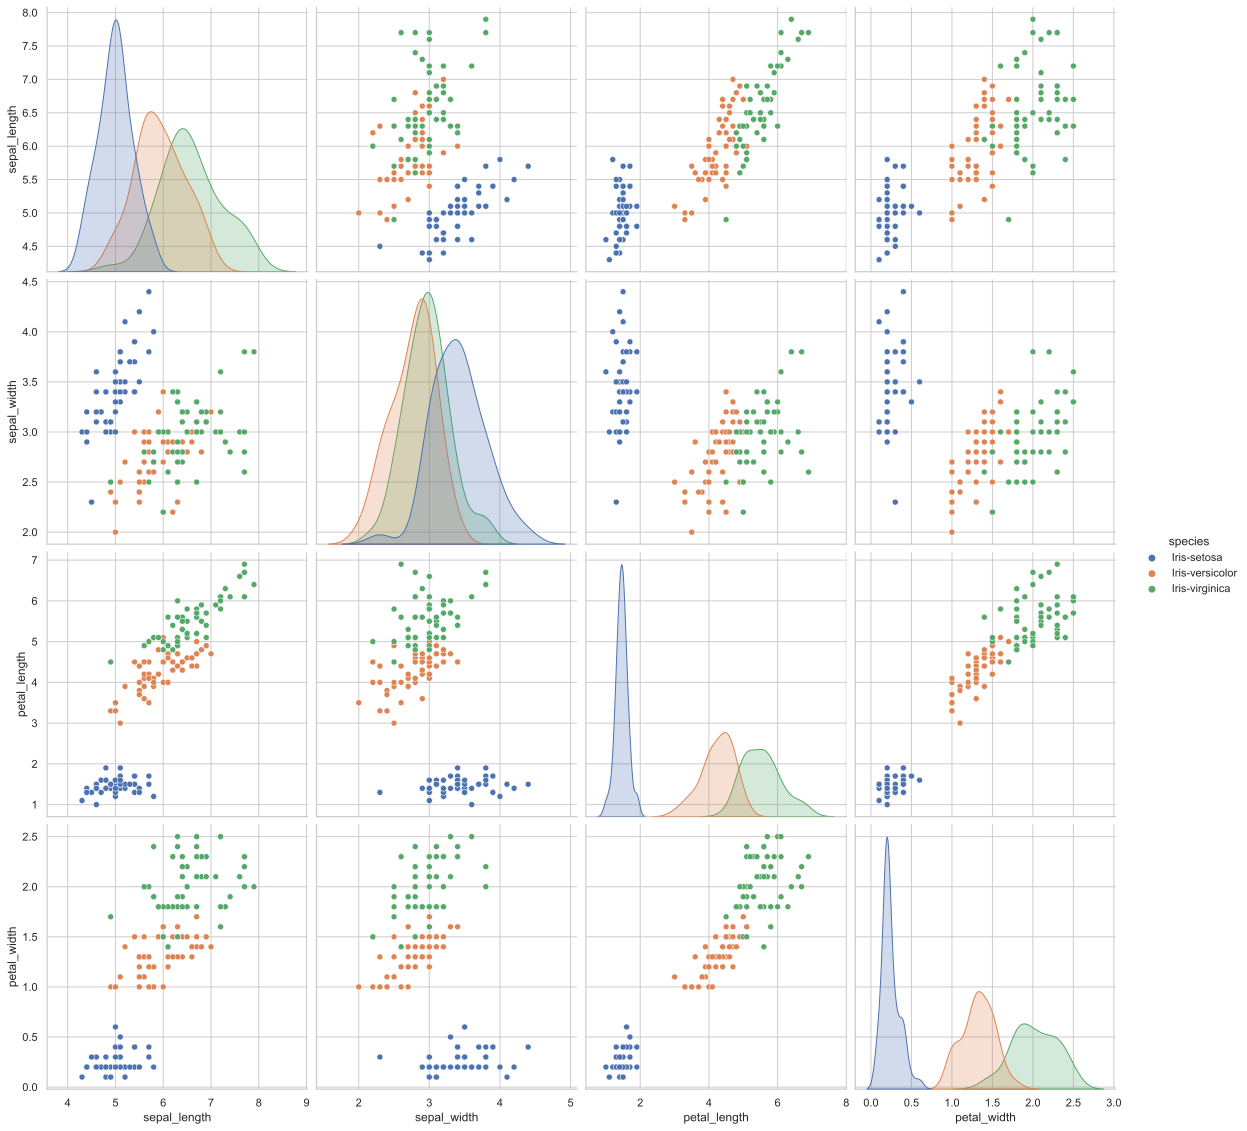

In [259]:
plt.close()
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.pairplot(iris_df, hue = 'species', height = 4)
# plt.show()
plt.savefig('pairplot.png')

In [260]:
## Observation: 
# we can say (petal_length, petal_width) or (petal_width, sepal_length) are the most usefull feature to identify various flower types
# while setosa can be easilty identified but virginica and versicolor has some overlapping 
# we can find lines or write simple if-else condition to build a simple model

In [261]:
# Limitation of pair plots: Pair plots are very painfull to understand when we have more then 4 to 5 dimentions of data because 
# for 4 dimention: we have to go through 6 uniques plots thats fine and for 5 dimentions: 10 thats also fine but what if we have 60, 100, 1000 dimentions 
# in that case we have to go through 1770, 4950, 499500 plots 😂 that would be dead end for us but we can reduce the dimension of data using simple but 
# powerful Dimensionality Reduction Techniques like Principal Component Analysis, t-Distributed Stochastic Neighbor Embedding (t-SNE), Factor Analysis that is
# beyond this blog scope in short use pair plots when you have 4 to 5 features

In [262]:
# till now we have seen 2D, 3D, and pair plots : which can help us to Visualise 4 to 5 dimension data 
# but what about 1D scatter plot ? lets see do we get any usefull information from 1D scatter plots

In [263]:
setosa = iris_df.loc[iris_df['species'] == 'Iris-setosa']
virginica = iris_df.loc[iris_df['species'] == 'Iris-virginica']
versicolor = iris_df.loc[iris_df['species'] == 'Iris-versicolor']

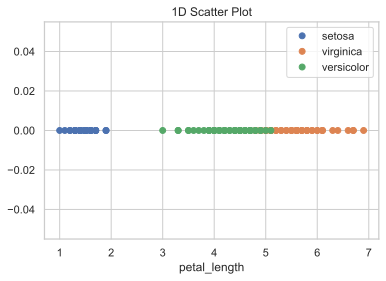

In [264]:
plt.plot(setosa['petal_length'], np.zeros_like(setosa['petal_length']), 'o', label = 'setosa')
plt.plot(virginica['petal_length'], np.zeros_like(virginica['petal_length']), 'o', label = 'virginica')
plt.plot(versicolor['petal_length'], np.zeros_like(versicolor['petal_length']), 'o', label = 'versicolor')
plt.xlabel('petal_length')
plt.title('1D Scatter Plot')
plt.legend()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histogram + PDF of Petal_length')

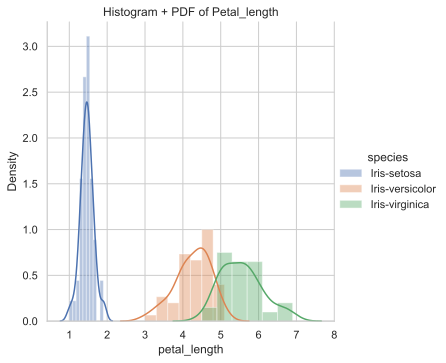

In [265]:
sns.FacetGrid(data = iris_df, hue = 'species', height = 5).map(sns.distplot, 'petal_length').add_legend()
plt.title('Histogram + PDF of Petal_length')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histogram + PDF of Petal_width')

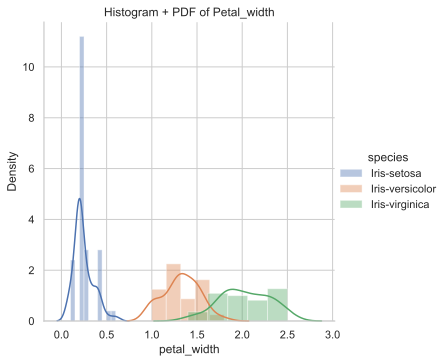

In [266]:
sns.FacetGrid(data = iris_df, hue = 'species', height = 5).map(sns.distplot, 'petal_width').add_legend()
plt.title('Histogram + PDF of Petal_width')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histogram + PDF of Sepal_width')

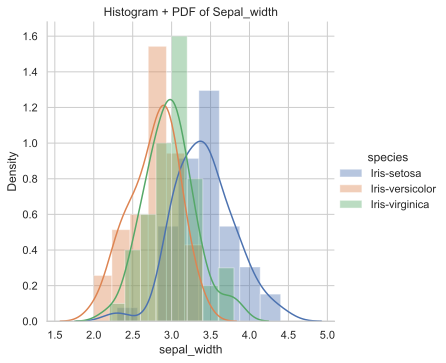

In [267]:
sns.FacetGrid(data = iris_df, hue = 'species', height = 5).map(sns.distplot, 'sepal_width').add_legend()
plt.title('Histogram + PDF of Sepal_width')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Histogram + PDF of Sepal_length')

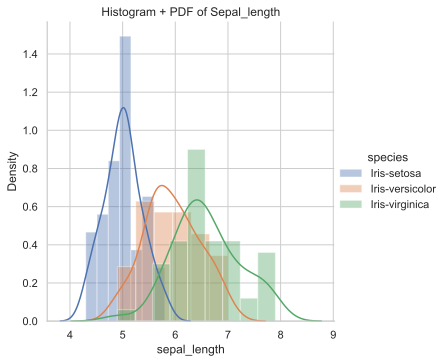

In [268]:
sns.FacetGrid(data = iris_df, hue = 'species', height = 5).map(sns.distplot, 'sepal_length').add_legend()
plt.title('Histogram + PDF of Sepal_length')

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


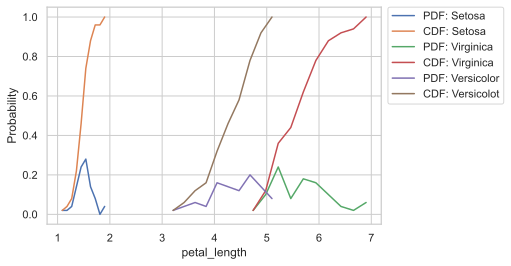

In [269]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF: Setosa')
plt.plot(bin_edges[1:], cdf, label = 'CDF: Setosa')
# virginica
counts, bin_edges = np.histogram(virginica['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF: Virginica')
plt.plot(bin_edges[1:], cdf, label = 'CDF: Virginica')
#versicolor
counts, bin_edges = np.histogram(versicolor['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF: Versicolor')
plt.plot(bin_edges[1:], cdf, label = 'CDF: Versicolot')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('petal_length')
plt.ylabel('Probability')
plt.show()

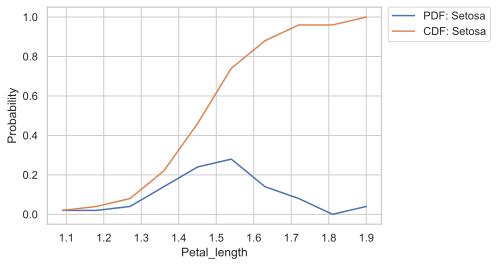

In [270]:
counts, bin_edges = np.histogram(setosa['petal_length'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = 'PDF: Setosa')
plt.plot(bin_edges[1:], cdf, label = 'CDF: Setosa')
plt.xlabel('Petal_length')
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

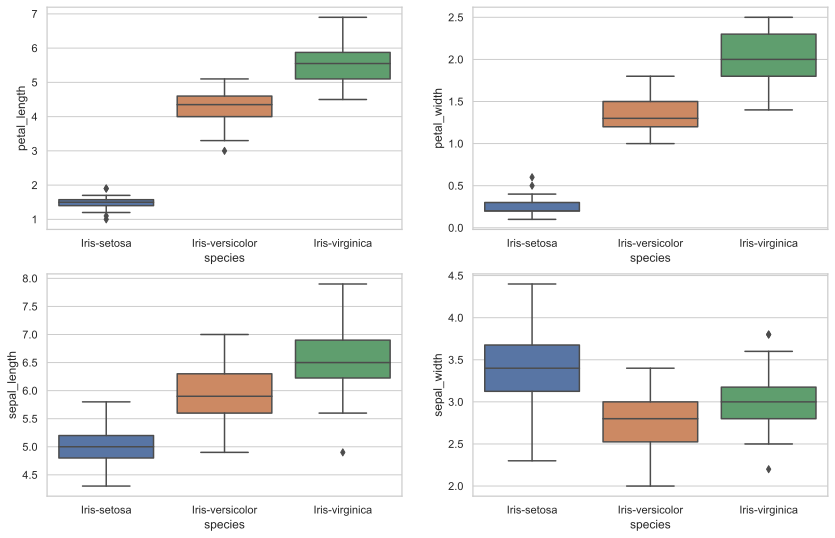

In [271]:
fig, axes = plt.subplots(2, 2, figsize = (14, 9))
sns.boxplot(data = iris_df, x = 'species', y = 'petal_length',ax = axes[0,0])
sns.boxplot(data = iris_df, x = 'species', y = 'petal_width',
ax = axes[0,1])
sns.boxplot(data = iris_df, x = 'species', y = 'sepal_length',
ax = axes[1,0])
sns.boxplot(data = iris_df, x = 'species', y = 'sepal_width',
ax = axes[1,1])

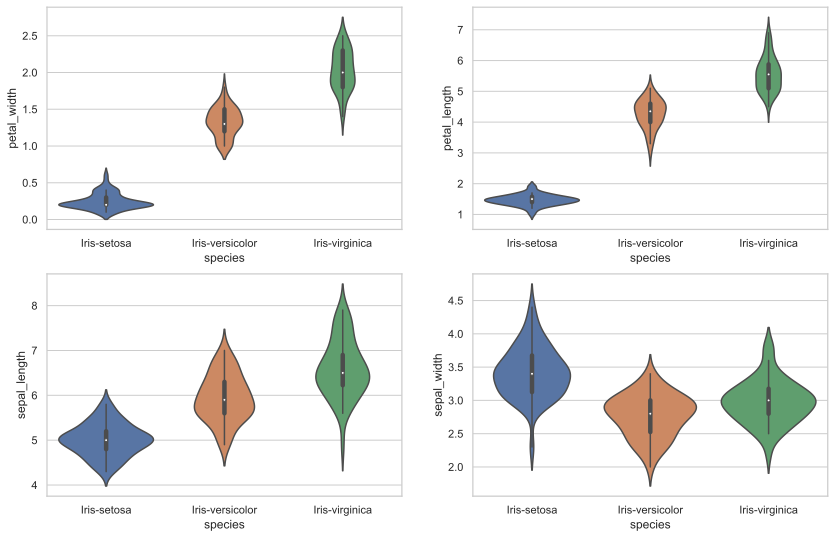

In [272]:
fig, axes = plt.subplots(2, 2, figsize=(14,9))
sns.violinplot( y='petal_width', x= 'species', data=iris_df, ax=axes[0, 0])
sns.violinplot( y='petal_length', x= 'species', data=iris_df, ax=axes[0, 1])
sns.violinplot( y='sepal_length', x= 'species', data=iris_df, ax=axes[1, 0])
sns.violinplot( y='sepal_width', x= 'species', data=iris_df, ax=axes[1, 1])
plt.show()